# Author: Aditi Langar

~ Under the GRIP tasks by The Sparks Founadtion in December 2020

## Problem Statement: Exploratory Data Analysis on IPL Data

## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Importing Datasets

In [2]:
deliveries = pd.read_csv('deliveries.csv')
matches = pd.read_csv('matches.csv')

## Analysis of Matches

In [3]:
matches.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


### Checking Info

In [4]:
matches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               756 non-null    int64 
 1   season           756 non-null    int64 
 2   city             749 non-null    object
 3   date             756 non-null    object
 4   team1            756 non-null    object
 5   team2            756 non-null    object
 6   toss_winner      756 non-null    object
 7   toss_decision    756 non-null    object
 8   result           756 non-null    object
 9   dl_applied       756 non-null    int64 
 10  winner           752 non-null    object
 11  win_by_runs      756 non-null    int64 
 12  win_by_wickets   756 non-null    int64 
 13  player_of_match  752 non-null    object
 14  venue            756 non-null    object
 15  umpire1          754 non-null    object
 16  umpire2          754 non-null    object
 17  umpire3          119 non-null    ob

Date is of the type object

Season is of the type int

### Checking Total Nulls

In [5]:
matches.isnull().sum()

id                   0
season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               4
win_by_runs          0
win_by_wickets       0
player_of_match      4
venue                0
umpire1              2
umpire2              2
umpire3            637
dtype: int64

### Checking Duplicated Values

In [6]:
matches.duplicated().sum()

0

### Checking Value Counts

In [7]:
for col in matches.columns:
    if matches[col].dtype == object:
        a = matches[col].value_counts()
        print("Feature: ", col, '\n',a, '\n',"*"*125)


Feature:  city 
 Mumbai            101
Kolkata            77
Delhi              74
Bangalore          66
Hyderabad          64
Chennai            57
Jaipur             47
Chandigarh         46
Pune               38
Durban             15
Bengaluru          14
Visakhapatnam      13
Ahmedabad          12
Centurion          12
Rajkot             10
Mohali             10
Indore              9
Dharamsala          9
Johannesburg        8
Port Elizabeth      7
Abu Dhabi           7
Cuttack             7
Ranchi              7
Cape Town           7
Sharjah             6
Raipur              6
Kochi               5
Kanpur              4
Nagpur              3
Kimberley           3
East London         3
Bloemfontein        2
Name: city, dtype: int64 
 *****************************************************************************************************************************
Feature:  date 
 2015-05-03    2
2015-05-02    2
22/04/18      2
05/05/18      2
2008-04-19    2
             ..
27/03/19     

### Treating the null values

Since nulls in city, winner, player_of_match, umpire1 and umpire2 are less, filling the NA's in these columns with the mode


In [8]:
matches.city.fillna(matches.city.mode()[0], inplace = True)

In [9]:
matches.city.value_counts()

Mumbai            108
Kolkata            77
Delhi              74
Bangalore          66
Hyderabad          64
Chennai            57
Jaipur             47
Chandigarh         46
Pune               38
Durban             15
Bengaluru          14
Visakhapatnam      13
Ahmedabad          12
Centurion          12
Rajkot             10
Mohali             10
Indore              9
Dharamsala          9
Johannesburg        8
Port Elizabeth      7
Abu Dhabi           7
Cuttack             7
Ranchi              7
Cape Town           7
Sharjah             6
Raipur              6
Kochi               5
Kanpur              4
Nagpur              3
Kimberley           3
East London         3
Bloemfontein        2
Name: city, dtype: int64

In [10]:
matches.winner.fillna(matches.winner.mode()[0], inplace = True)

In [11]:
matches.player_of_match.fillna(matches.player_of_match.mode()[0], inplace = True)

In [12]:
matches.umpire1.fillna(matches.umpire1.mode()[0], inplace = True)

In [13]:
matches.umpire2.fillna(matches.umpire2.mode()[0], inplace = True)

In [14]:
matches.count()

id                 756
season             756
city               756
date               756
team1              756
team2              756
toss_winner        756
toss_decision      756
result             756
dl_applied         756
winner             756
win_by_runs        756
win_by_wickets     756
player_of_match    756
venue              756
umpire1            756
umpire2            756
umpire3            119
dtype: int64

In [15]:
((756-119)/756)*100

84.25925925925925

Umpire 3 has 84% missing data and treating the nulls in this column can result into biasness

In [16]:
matches[matches['umpire3'].isna()]

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,HDPK Dharmasena,C Shamshuddin,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
632,633,2016,Bangalore,2016-05-24,Gujarat Lions,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Royal Challengers Bangalore,0,4,AB de Villiers,M Chinnaswamy Stadium,AK Chaudhary,HDPK Dharmasena,NaN
633,634,2016,Delhi,2016-05-25,Sunrisers Hyderabad,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Sunrisers Hyderabad,22,0,MC Henriques,Feroz Shah Kotla,M Erasmus,C Shamshuddin,NaN
634,635,2016,Delhi,2016-05-27,Gujarat Lions,Sunrisers Hyderabad,Sunrisers Hyderabad,field,normal,0,Sunrisers Hyderabad,0,4,DA Warner,Feroz Shah Kotla,M Erasmus,CK Nandan,NaN
635,636,2016,Bangalore,2016-05-29,Sunrisers Hyderabad,Royal Challengers Bangalore,Sunrisers Hyderabad,bat,normal,0,Sunrisers Hyderabad,8,0,BCJ Cutting,M Chinnaswamy Stadium,HDPK Dharmasena,BNJ Oxenford,NaN


In [17]:
print(matches.season.max(),
      matches.season.min())

2019 2008


In [18]:
matches.dl_applied.value_counts()

0    737
1     19
Name: dl_applied, dtype: int64

## Top 5 players of the matches

In [19]:
matches.player_of_match.value_counts().head()

CH Gayle          25
AB de Villiers    20
DA Warner         17
RG Sharma         17
MS Dhoni          17
Name: player_of_match, dtype: int64

In [20]:
matches.columns

Index(['id', 'season', 'city', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs',
       'win_by_wickets', 'player_of_match', 'venue', 'umpire1', 'umpire2',
       'umpire3'],
      dtype='object')

## Total matches played by a team

In [21]:
teams = matches.team1.append(matches.team2)

In [22]:
teams_df = pd.DataFrame(teams)

In [23]:
teams_df.head()

,0
0,Sunrisers Hyderabad
1,Mumbai Indians
2,Gujarat Lions
3,Rising Pune Supergiant
4,Royal Challengers Bangalore


In [24]:
len(teams_df)

1512

In [25]:
teams_df.columns = ['team']

In [26]:
teams_df.head()

,team
0,Sunrisers Hyderabad
1,Mumbai Indians
2,Gujarat Lions
3,Rising Pune Supergiant
4,Royal Challengers Bangalore


In [27]:
total_matches_played = pd.DataFrame(teams_df.team.value_counts()).reset_index()

In [28]:
total_matches_played

,index,team
0,Mumbai Indians,187
1,Royal Challengers Bangalore,180
2,Kolkata Knight Riders,178
3,Kings XI Punjab,176
4,Chennai Super Kings,164
5,Delhi Daredevils,161
6,Rajasthan Royals,147
7,Sunrisers Hyderabad,108
8,Deccan Chargers,75
9,Pune Warriors,46


## Total matches won by a particular team

In [29]:
matches_winner = pd.DataFrame(matches.winner.value_counts()).reset_index()

In [30]:
matches_winner

,index,winner
0,Mumbai Indians,113
1,Chennai Super Kings,100
2,Kolkata Knight Riders,92
3,Royal Challengers Bangalore,84
4,Kings XI Punjab,82
5,Rajasthan Royals,75
6,Delhi Daredevils,67
7,Sunrisers Hyderabad,58
8,Deccan Chargers,29
9,Gujarat Lions,13


## Total matches lost by a particular team

Is equal to total matches played minus total won

In [31]:
merged_inner = pd.merge(left=total_matches_played, right=matches_winner, left_on='index', right_on='index')

In [32]:
merged_inner

,index,team,winner
0,Mumbai Indians,187,113
1,Royal Challengers Bangalore,180,84
2,Kolkata Knight Riders,178,92
3,Kings XI Punjab,176,82
4,Chennai Super Kings,164,100
5,Delhi Daredevils,161,67
6,Rajasthan Royals,147,75
7,Sunrisers Hyderabad,108,58
8,Deccan Chargers,75,29
9,Pune Warriors,46,12


In [33]:
merged_inner['lost'] = merged_inner.team - merged_inner.winner

In [34]:
merged_inner

,index,team,winner,lost
0,Mumbai Indians,187,113,74
1,Royal Challengers Bangalore,180,84,96
2,Kolkata Knight Riders,178,92,86
3,Kings XI Punjab,176,82,94
4,Chennai Super Kings,164,100,64
5,Delhi Daredevils,161,67,94
6,Rajasthan Royals,147,75,72
7,Sunrisers Hyderabad,108,58,50
8,Deccan Chargers,75,29,46
9,Pune Warriors,46,12,34


## Toss Related Analysis

In [35]:
matches.toss_winner.value_counts()

Mumbai Indians                 98
Kolkata Knight Riders          92
Chennai Super Kings            89
Royal Challengers Bangalore    81
Kings XI Punjab                81
Delhi Daredevils               80
Rajasthan Royals               80
Sunrisers Hyderabad            46
Deccan Chargers                43
Pune Warriors                  20
Gujarat Lions                  15
Delhi Capitals                 10
Kochi Tuskers Kerala            8
Rising Pune Supergiants         7
Rising Pune Supergiant          6
Name: toss_winner, dtype: int64

### Batting or fieldling first after winning toss

In [36]:
matches.groupby(matches.toss_decision).toss_decision.count()

toss_decision
bat      293
field    463
Name: toss_decision, dtype: int64

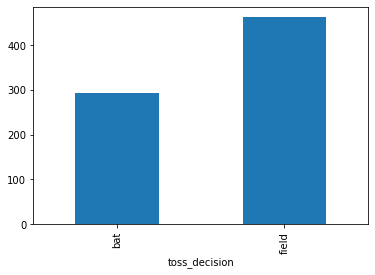

In [37]:
matches.groupby(matches.toss_decision).toss_decision.count().plot(kind = "bar")

## Analysis of Deliveries

In [38]:
deliveries.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


### Checking Info

In [39]:
deliveries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179078 entries, 0 to 179077
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   match_id          179078 non-null  int64 
 1   inning            179078 non-null  int64 
 2   batting_team      179078 non-null  object
 3   bowling_team      179078 non-null  object
 4   over              179078 non-null  int64 
 5   ball              179078 non-null  int64 
 6   batsman           179078 non-null  object
 7   non_striker       179078 non-null  object
 8   bowler            179078 non-null  object
 9   is_super_over     179078 non-null  int64 
 10  wide_runs         179078 non-null  int64 
 11  bye_runs          179078 non-null  int64 
 12  legbye_runs       179078 non-null  int64 
 13  noball_runs       179078 non-null  int64 
 14  penalty_runs      179078 non-null  int64 
 15  batsman_runs      179078 non-null  int64 
 16  extra_runs        179078 non-null  int

### Checking for Null Values

In [40]:
deliveries.isnull().sum()

match_id                 0
inning                   0
batting_team             0
bowling_team             0
over                     0
ball                     0
batsman                  0
non_striker              0
bowler                   0
is_super_over            0
wide_runs                0
bye_runs                 0
legbye_runs              0
noball_runs              0
penalty_runs             0
batsman_runs             0
extra_runs               0
total_runs               0
player_dismissed    170244
dismissal_kind      170244
fielder             172630
dtype: int64

### Checking for Duplicated Values

In [41]:
deliveries.duplicated().sum()

23

We can leave the duplicated rows as it is becasue they are very few in numbere and will not result in any biasness in data.

In [42]:
deliveries.dismissal_kind.value_counts()

caught                   5348
bowled                   1581
run out                   852
lbw                       540
stumped                   278
caught and bowled         211
retired hurt               12
hit wicket                 10
obstructing the field       2
Name: dismissal_kind, dtype: int64

### Checking Unique Values where Column Type is Object

In [46]:
for col in deliveries.columns:
    if deliveries[col].dtype == object:
        a = deliveries[col].value_counts()
        print("Feature: ", col, '\n', a, '\n', '*'*124)

Feature:  batting_team 
 Mumbai Indians                 22619
Kings XI Punjab                20931
Royal Challengers Bangalore    20908
Kolkata Knight Riders          20858
Chennai Super Kings            19762
Delhi Daredevils               18786
Rajasthan Royals               17292
Sunrisers Hyderabad            12908
Deccan Chargers                 9034
Pune Warriors                   5443
Gujarat Lions                   3566
Delhi Capitals                  1909
Rising Pune Supergiant          1900
Kochi Tuskers Kerala            1582
Rising Pune Supergiants         1580
Name: batting_team, dtype: int64 
 ****************************************************************************************************************************
Feature:  bowling_team 
 Mumbai Indians                 22517
Royal Challengers Bangalore    21236
Kolkata Knight Riders          20940
Kings XI Punjab                20782
Chennai Super Kings            19556
Delhi Daredevils               18725
Rajasthan Roy

### Total wickets between different overs

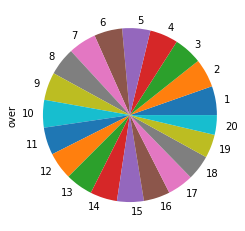

In [47]:
condition = (deliveries.dismissal_kind != 'run out')&(deliveries.dismissal_kind != 'retired hurt')&(deliveries.dismissal_kind != 'notout')
df = deliveries.loc[condition,:]
df.groupby([df.over]).over.count().plot(kind='pie')

### Total runs conceded by a team in all seasons

In [48]:
deliveries.groupby(deliveries.bowling_team).total_runs.sum()

bowling_team
Chennai Super Kings            25194
Deccan Chargers                11618
Delhi Capitals                  2674
Delhi Daredevils               24811
Gujarat Lions                   5090
Kings XI Punjab                28326
Kochi Tuskers Kerala            1986
Kolkata Knight Riders          27375
Mumbai Indians                 28901
Pune Warriors                   6857
Rajasthan Royals               22657
Rising Pune Supergiant          2436
Rising Pune Supergiants         2113
Royal Challengers Bangalore    28569
Sunrisers Hyderabad            16683
Name: total_runs, dtype: int64

### Total wickets taken by bowler excluding run out and retired hurt

In [50]:
condition = (deliveries.dismissal_kind != 'run out')&(deliveries.dismissal_kind != 'retired hurt')&(deliveries.dismissal_kind != 'notout')
df = deliveries.loc[condition,:]

In [51]:
df

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179072,11415,2,Chennai Super Kings,Mumbai Indians,20,1,SR Watson,RA Jadeja,SL Malinga,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
179073,11415,2,Chennai Super Kings,Mumbai Indians,20,2,RA Jadeja,SR Watson,SL Malinga,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
179074,11415,2,Chennai Super Kings,Mumbai Indians,20,3,SR Watson,RA Jadeja,SL Malinga,0,...,0,0,0,0,2,0,2,NaN,NaN,NaN
179076,11415,2,Chennai Super Kings,Mumbai Indians,20,5,SN Thakur,RA Jadeja,SL Malinga,0,...,0,0,0,0,2,0,2,NaN,NaN,NaN


### Maximum wickets taken in death overs excluding run outs and retired hurt

In [52]:
condition = (deliveries.over > 15) &(deliveries.dismissal_kind != 'run out')&(deliveries.dismissal_kind != 'retired hurt')&(deliveries.dismissal_kind != 'notout')
df = deliveries.loc[condition,:]

In [53]:
df

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
93,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,16,1,MC Henriques,Yuvraj Singh,YS Chahal,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
94,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,16,2,MC Henriques,Yuvraj Singh,YS Chahal,0,...,0,0,0,0,0,0,0,MC Henriques,caught,Sachin Baby
95,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,16,3,Yuvraj Singh,DJ Hooda,YS Chahal,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
96,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,16,4,DJ Hooda,Yuvraj Singh,YS Chahal,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
97,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,16,5,Yuvraj Singh,DJ Hooda,YS Chahal,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179072,11415,2,Chennai Super Kings,Mumbai Indians,20,1,SR Watson,RA Jadeja,SL Malinga,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
179073,11415,2,Chennai Super Kings,Mumbai Indians,20,2,RA Jadeja,SR Watson,SL Malinga,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
179074,11415,2,Chennai Super Kings,Mumbai Indians,20,3,SR Watson,RA Jadeja,SL Malinga,0,...,0,0,0,0,2,0,2,NaN,NaN,NaN
179076,11415,2,Chennai Super Kings,Mumbai Indians,20,5,SN Thakur,RA Jadeja,SL Malinga,0,...,0,0,0,0,2,0,2,NaN,NaN,NaN


### Minimum runs conceded in death overs per ball

In [54]:
#Including only those bowlers that have bowled atleast 15 death overs
del_series = deliveries.groupby(deliveries.bowler).total_runs.count()
del_df = pd.DataFrame(del_series).reset_index()
del_df.columns = ['bowler','delivery']
bowlers = del_df.loc[del_df.delivery >=90,:].bowler

In [56]:
condition = (deliveries.over > 15) & (deliveries.bowler.isin(bowlers))
df = deliveries.loc[condition,:]
df.groupby(df.bowler).total_runs.mean().sort_values().head(10).to_frame()

,total_runs
bowler,
RD Chahar,0.416667
S Badree,0.666667
N Rana,0.833333
Washington Sundar,0.833333
PD Collingwood,0.913043
A Chandila,1.000000
K Gowtham,1.000000
GJ Maxwell,1.032258
R Tewatia,1.047619


## Batsman

### Total runs scored in different overs

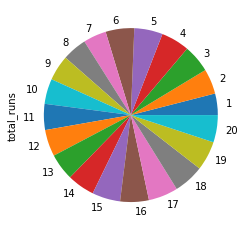

In [57]:
deliveries.groupby([deliveries.over]).total_runs.sum().plot(kind='pie')

### Total runs scored by diffrent batsman

In [59]:
deliveries.groupby(deliveries.batsman).batsman_runs.sum().sort_values(ascending=False).to_frame()

,batsman_runs
batsman,
V Kohli,5434
SK Raina,5415
RG Sharma,4914
DA Warner,4741
S Dhawan,4632
...,...
J Denly,0
C Nanda,0
RR Bhatkal,0


### Maximum centuries scored by a batsman

In [61]:
runs_series = deliveries.groupby([deliveries.match_id,deliveries.batsman]).total_runs.sum()
runs_df = pd.DataFrame(runs_series)
runs_df = runs_df.reset_index()
condition = runs_df.total_runs >= 100
player_100df = runs_df.loc[condition,:]
player_100df.groupby(player_100df.batsman).total_runs.count().sort_values(ascending=False).head(5).to_frame()

,total_runs
batsman,
CH Gayle,10
V Kohli,6
SR Watson,5
DA Warner,5
KL Rahul,3


## FIELDERS

### Best Fielder in terms of runout

In [63]:
condition = deliveries.dismissal_kind == 'run out'
df = deliveries.loc[condition,:]
df.groupby(df.fielder).batsman.count().sort_values(ascending=False).to_frame()

,batsman
fielder,
MS Dhoni,23
RA Jadeja,20
V Kohli,17
SK Raina,16
MK Pandey,14
...,...
PJ Cummins,1
S Randiv,1
S Narwal,1


### Best Fielder in terms of catches

In [64]:
condition = (deliveries.dismissal_kind == 'caught and bowled') |(deliveries.dismissal_kind == 'caught')
df = deliveries.loc[condition,:]
df.groupby(df.fielder).batsman.count().sort_values(ascending=False).to_frame()

,batsman
fielder,
KD Karthik,109
SK Raina,99
MS Dhoni,98
AB de Villiers,93
RV Uthappa,84
...,...
LA Pomersbach (sub),1
CJ Jordan (sub),1
L Ngidi,1


### Best Keeper in terms of catching and stumping

In [65]:
condition = (deliveries.dismissal_kind == 'stumped')
df = deliveries.loc[condition,:]
df.groupby(df.fielder).batsman.count().sort_values(ascending=False).to_frame()

,batsman
fielder,
MS Dhoni,38
RV Uthappa,32
KD Karthik,29
WP Saha,18
AC Gilchrist,16
PA Patel,16
NV Ojha,10
KC Sangakkara,9
RR Pant,9


## Analysis After Joining the Tables

In [66]:
combined = deliveries.set_index('match_id').join(matches.set_index('id'),how='inner')

### Best fielders in terms of catches seasonwise

In [67]:
condition = combined.fielder != 'notout'
df = combined.loc[condition,:]
fielders_df = df.groupby([df.season,df.fielder]).non_striker.count()
fielders_df = pd.DataFrame(fielders_df)
fielders_df = fielders_df.reset_index()

In [68]:
condition = fielders_df.season == 2013
fielders_df.loc[condition,:].sort_values('non_striker',ascending=False).head(2)

,season,fielder,non_striker
817,2013,MS Dhoni,19
864,2013,SV Samson,15


### Best Batsman in terms of season

In [69]:
runs_series = combined.groupby([combined.season,combined.batsman]).total_runs.sum()
runs_df = pd.DataFrame(runs_series)
runs_df.reset_index(inplace=True)

condition = runs_df.season == 2016
runs_df.loc[condition,:].sort_values('total_runs',ascending=False).head(5)

,season,batsman,total_runs
1383,2016,V Kohli,998
1278,2016,DA Warner,884
1256,2016,AB de Villiers,714
1357,2016,S Dhawan,523
1288,2016,G Gambhir,520
